In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta

In [2]:
files_path = r"C:\Users\mehmetg\jupyter\EPIAS_KGUP-Rolling_Source-Based"
files = os.listdir(files_path)
files = [f for f in files if ".csv" in f]

In [3]:
dfs = []
for file in files:
    dfs.append(pd.read_csv(os.path.join(files_path,file), header=0, index_col=0, parse_dates=True))

In [4]:
df = pd.concat(dfs).sort_index()
daily = df.resample("D").mean()
today = datetime.today().replace(hour=0, minute=0,second=0,microsecond=0)
daily = daily[:today-timedelta(days=1)]
# dam = daily['Dam']
# ror = daily['Run-of-River']
# hydro = dam+ror

In [5]:
def seag(ts):
    seag = ts.groupby([ts.index.dayofyear, ts.index.year]).first().unstack()
    return seag

In [6]:
# dam_seag = seag(dam.rolling(7).mean())
# ror_seag = seag(ror.rolling(7).mean())
# hydro_seag = seag(hydro.rolling(7).mean())

In [7]:
def plot_seag(seag, title=""):
    plt.figure(figsize=(8,5))
    plt.fill_between(
        seag.index, seag[seag.columns[:-1]].min(axis=1),
        seag[seag.columns[:-1]].max(axis=1), color="gray",
        alpha=0.7, label="{}-{}".format(seag.columns[0], seag.columns[-2]))
    plt.plot(seag[today.year], color="red", label=today.year)
    plt.title(title, loc="left")
    plt.grid(True)
    plt.legend(loc=0)
    plt.xlim(seag.index.min(), seag.index.max())
    plt.show()

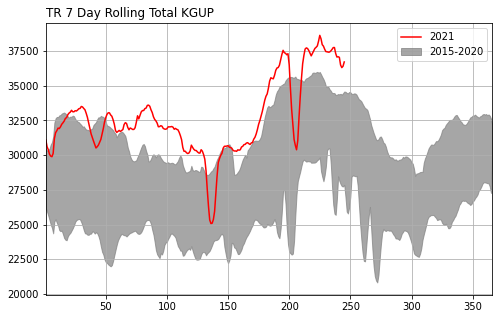

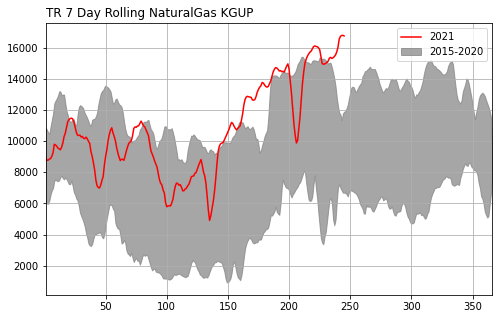

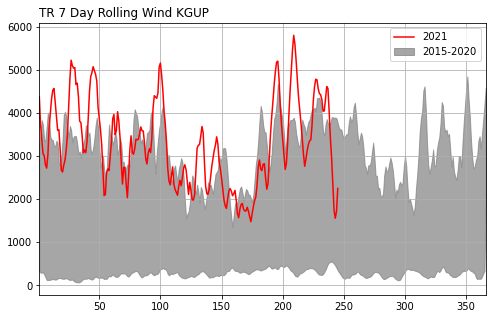

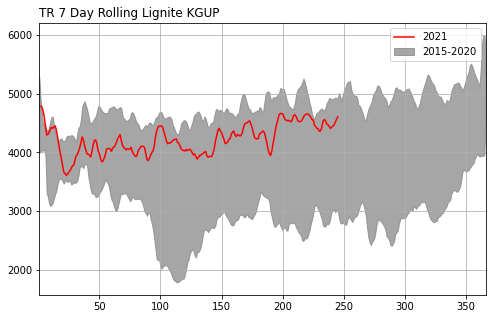

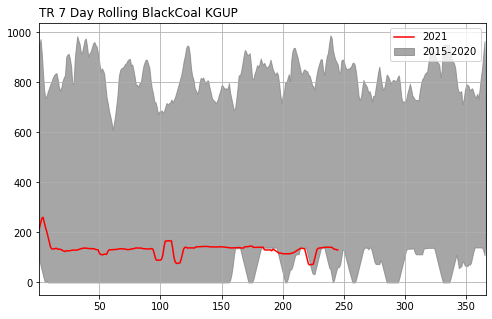

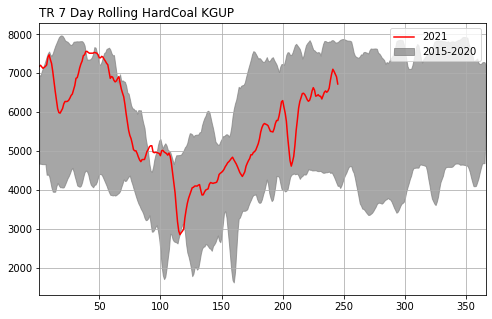

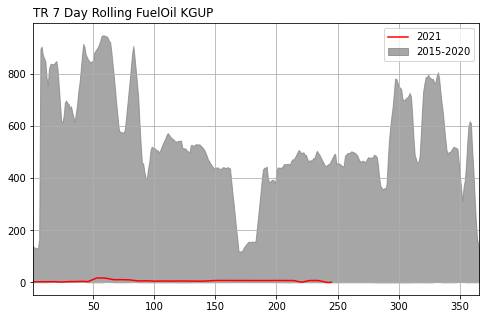

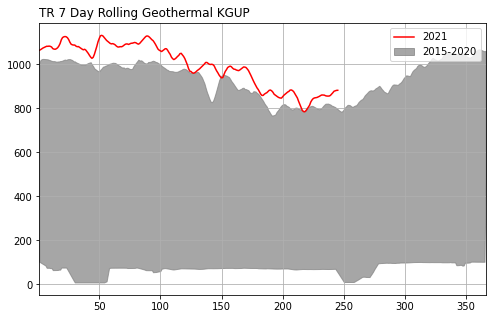

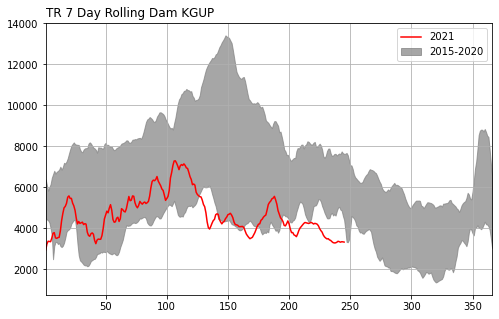

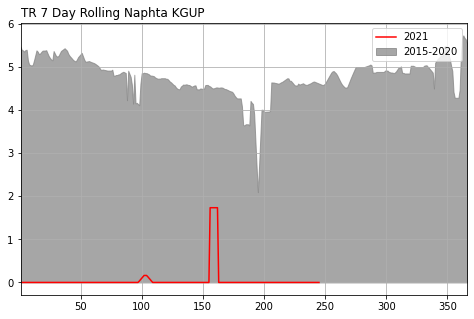

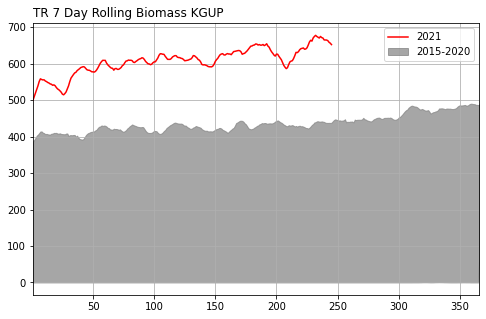

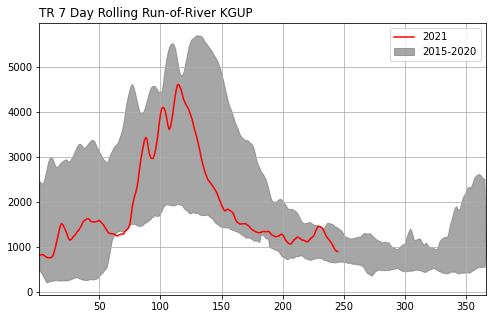

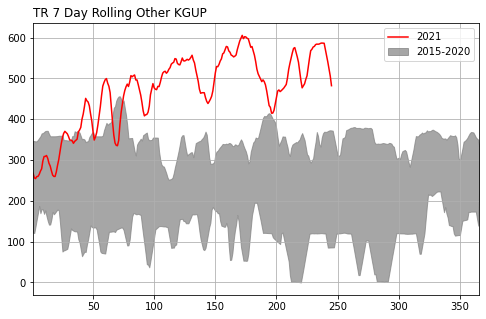

In [8]:
for col in df.columns:
    df_seag = seag(df[col].resample("D").mean()[:today-timedelta(days=1)].rolling(7).mean())
    plot_seag(df_seag, "TR 7 Day Rolling {} KGUP".format(col))

In [9]:
d1 = df['2021-06-01':].head(24)['Dam']+df['2021-06-01':].head(24)['Run-of-River']
d2 = df['2021-05-30':].head(24)['Dam']+df['2021-05-30':].head(24)['Run-of-River']
d3 = df['2021-05-24':].head(24)['Dam']+df['2021-05-24':].head(24)['Run-of-River']

In [10]:
d1.index = d1.index.hour
d2.index = d2.index.hour
d3.index = d3.index.hour

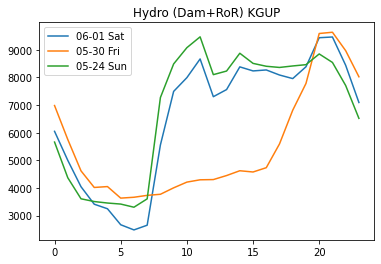

In [11]:
plt.plot(d1, label="06-01 Sat")
plt.plot(d2, label="05-30 Fri")
plt.plot(d3, label="05-24 Sun")
plt.legend(loc=0)
plt.title('Hydro (Dam+RoR) KGUP')
plt.show()

In [12]:
daily

,Total,NaturalGas,Wind,Lignite,BlackCoal,HardCoal,FuelOil,Geothermal,Dam,Naphta,Biomass,Run-of-River,Other
DateTime,,,,,,,,,,,,,
2015-01-01,20488.630208,9156.947917,358.417708,3454.329167,558.958333,4384.500000,773.541667,75.500000,1065.915000,4.6375,0.000000,532.882917,123.000000
2015-01-02,24776.528417,11909.850833,212.585500,3379.431667,715.416667,4564.500000,925.833333,75.500000,2161.415000,4.8000,0.000000,628.699583,198.495833
2015-01-03,25917.351708,13180.007500,117.197542,3368.762500,631.625000,4601.125000,963.041667,75.500000,2184.098333,4.9000,0.000000,586.169167,204.925000
2015-01-04,22497.537625,10599.436250,170.799708,3357.083333,632.708333,4660.500000,908.541667,75.500000,1371.502500,4.9000,0.000000,546.365833,170.200000
2015-01-05,25324.034250,12217.443333,348.216333,3248.250000,631.208333,4479.500000,984.291667,75.500000,2543.269167,4.9000,0.000000,600.163750,191.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-29,33605.731667,15741.822917,1407.722917,4494.690833,119.000000,6183.325000,0.000000,897.587083,2842.972083,0.0000,663.061250,779.183750,476.365833
2021-08-30,34418.375833,16394.292917,1621.866250,4379.297917,110.750000,6101.945833,0.000000,885.293750,2986.743333,0.0000,655.531667,808.477083,474.177083
2021-08-31,37083.793333,16935.910417,2835.779583,4525.658750,139.016667,6340.500000,0.000000,871.874167,3494.527083,0.0000,633.492917,834.423750,472.610000


In [13]:
#daily.to_excel("dailyyyyyyy.xlsx")